In [1]:
!pip install tensorflow==1.15

     |████████████████████████████████| 412.3 MB 19 kB/s 
     |████████████████████████████████| 50 kB 5.7 MB/s 
     |████████████████████████████████| 503 kB 67.9 MB/s 
     |████████████████████████████████| 3.8 MB 24.8 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=b80b49c362f892941707b08bbd7ab8e47b909f36746297abd9e17cc92a4dd12a
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.6.0
    Uninstalling tensorflow-estimator-2.6.0:
      Successfully uninstalled tensorflow-estimator-2.6.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.6.0
    Uninstalling tensorboard-2.6.0:
      Successfully uninstalled tensorboard-2.6.0
  Attempting uninstall: gast
    Found existing installation: gast 0.4.0
    Uninstalling gast-0.4.0:
      Succes

In [2]:
!pip install keras==2.1.0

     |████████████████████████████████| 302 kB 5.2 MB/s 
  Attempting uninstall: keras
    Found existing installation: keras 2.6.0
    Uninstalling keras-2.6.0:
      Successfully uninstalled keras-2.6.0


In [3]:
!pip install 'h5py==2.10.0' --force-reinstall

     |████████████████████████████████| 2.9 MB 5.2 MB/s 
     |████████████████████████████████| 15.7 MB 185 kB/s 
  Attempting uninstall: six
    Found existing installation: six 1.15.0
    Uninstalling six-1.15.0:
      Successfully uninstalled six-1.15.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-probability 0.13.0 requires gast>=0.3.2, but you have gast 0.2.2 which is incompatible.
kapre 0.3.5 requires tensorflow>=2.0.0, but you have tensorflow 1.15.0 which is incompatible.
google-colab 1.0.0 requires six~=1.15.0, but you have six 1.16.0 which is incom

In [1]:
!git clone https://github.com/matterport/Mask_RCNN

Cloning into 'Mask_RCNN'...
remote: Enumerating objects: 956, done.
remote: Total 956 (delta 0), reused 0 (delta 0), pack-reused 956
Receiving objects: 100% (956/956), 125.23 MiB | 31.51 MiB/s, done.
Resolving deltas: 100% (562/562), done.


In [2]:
import os
os.chdir('Mask_RCNN/samples')

In [3]:
import sys
import random
import math
import numpy as np
import skimage.io
import matplotlib
import matplotlib.pyplot as plt

# Root directory of the project
ROOT_DIR = os.path.abspath("../")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
# Import COCO config
sys.path.append(os.path.join(ROOT_DIR, "samples/coco/"))  # To find local version
import coco

%matplotlib inline 

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# Local path to trained weights file
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")
# Download COCO trained weights from Releases if needed
if not os.path.exists(COCO_MODEL_PATH):
    utils.download_trained_weights(COCO_MODEL_PATH)

# Directory of images to run detection on
IMAGE_DIR = os.path.join(ROOT_DIR, "images")

Using TensorFlow backend.


... done downloading pretrained model!


In [4]:
class InferenceConfig(coco.CocoConfig):
    # Set batch size to 1 since we'll be running inference on
    # one image at a time. Batch size = GPU_COUNT * IMAGES_PER_GPU
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

config = InferenceConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                93
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

In [5]:
# Create model object in inference mode.
model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR, config=config)

# Load weights trained on MS-COCO
model.load_weights(COCO_MODEL_PATH, by_name=True)






Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
box_ind is deprecated, use box_indices instead


Instructions for updating:
Use `tf.cast` instead.








In [6]:
# COCO Class names
# Index of the class in the list is its ID. For example, to get ID of
# the teddy bear class, use: class_names.index('teddy bear')
class_names = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
               'bus', 'train', 'truck', 'boat', 'traffic light',
               'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
               'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
               'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
               'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
               'kite', 'baseball bat', 'baseball glove', 'skateboard',
               'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
               'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
               'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
               'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
               'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
               'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
               'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
               'teddy bear', 'hair drier', 'toothbrush']

Processing 1 images
image                    shape: (511, 640, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  150.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


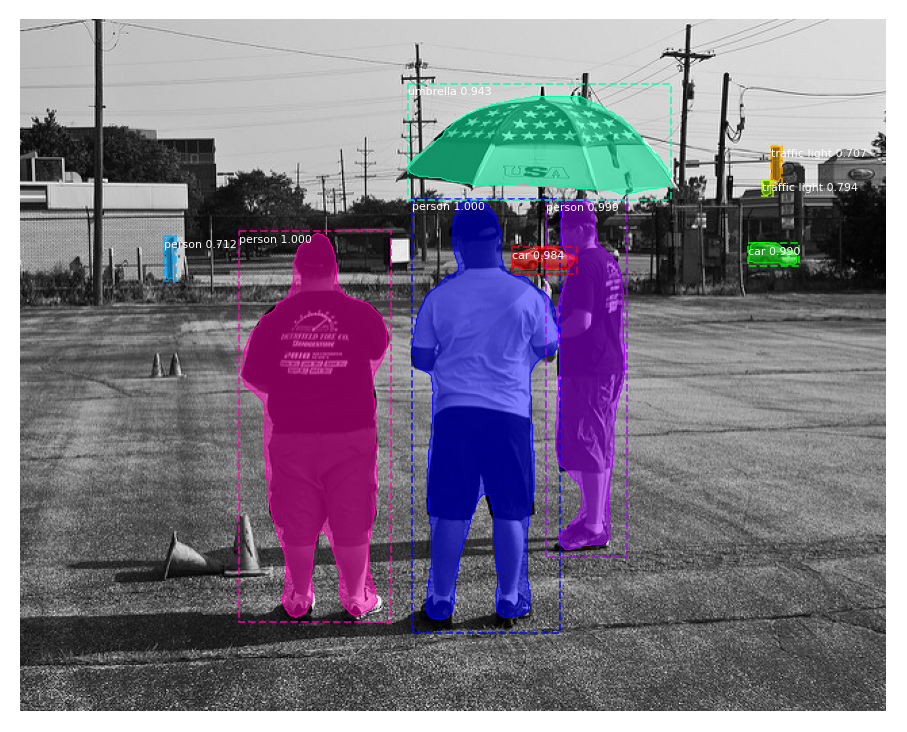

In [7]:
# Load a random image from the images folder
file_names = next(os.walk(IMAGE_DIR))[2]
image = skimage.io.imread(os.path.join(IMAGE_DIR, random.choice(file_names)))

# Run detection
results = model.detect([image], verbose=1)

# Visualize results
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            class_names, r['scores'])

In [47]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [49]:
!ls '/content/drive/My Drive/maskrcnn_train_tensorflow_colab-master/mask_rcnn_dog_0005.h5'

'/content/drive/My Drive/maskrcnn_train_tensorflow_colab-master/mask_rcnn_dog_0005.h5'


In [58]:
from google.colab import files
uploaded = files.upload()

Saving dog1.jpeg to dog1.jpeg


In [53]:
# import the necessary packages
from mrcnn.config import Config
from mrcnn import model as modellib
from mrcnn import visualize
import numpy as np
import colorsys
# import argparse
import imutils
import random
import cv2
import os

In [54]:
# construct the argument parse and parse the arguments
# ap = argparse.ArgumentParser()
# ap.add_argument("-w", "--weights", required=True,
# 	help="path to Mask R-CNN model weights pre-trained on COCO")
# ap.add_argument("-l", "--labels", required=True,
# 	help="path to class labels file")
# ap.add_argument("-i", "--image", required=True,
# 	help="path to input image to apply Mask R-CNN to")
# args = vars(ap.parse_args())

In [55]:
# load the class label names from disk, one label per line
CLASS_NAMES = open('/content/Mask_RCNN/lables.txt').read().strip().split("\n")
# generate random (but visually distinct) colors for each class label
# (thanks to Matterport Mask R-CNN for the method!)
hsv = [(i / len(CLASS_NAMES), 1, 1.0) for i in range(len(CLASS_NAMES))]
COLORS = list(map(lambda c: colorsys.hsv_to_rgb(*c), hsv))
random.seed(42)
random.shuffle(COLORS)

In [56]:
class SimpleConfig(Config):
	# give the configuration a recognizable name
	NAME = "coco_inference"
	# set the number of GPUs to use along with the number of images
	# per GPU
	GPU_COUNT = 1
	IMAGES_PER_GPU = 1
	# number of classes (we would normally add +1 for the background
	# but the background class is *already* included in the class
	# names)
	NUM_CLASSES = len(CLASS_NAMES)

In [57]:
# initialize the inference configuration
config = SimpleConfig()
# initialize the Mask R-CNN model for inference and then load the
# weights
print("[INFO] loading Mask R-CNN model...")
model = modellib.MaskRCNN(mode="inference", config=config,
	model_dir=os.getcwd())
model.load_weights('/content/drive/My Drive/maskrcnn_train_tensorflow_colab-master/mask_rcnn_dog_0005.h5', by_name=True)

[INFO] loading Mask R-CNN model...


In [60]:
# load the input image, convert it from BGR to RGB channel
# ordering, and resize the image
image = cv2.imread('dog1.jpeg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = imutils.resize(image, width=512)
# perform a forward pass of the network to obtain the results
print("[INFO] making predictions with Mask R-CNN...")
r = model.detect([image], verbose=1)[0]

[INFO] making predictions with Mask R-CNN...
Processing 1 images
image                    shape: (384, 512, 3)         min:    1.00000  max:  225.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  115.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


In [61]:
# loop over of the detected object's bounding boxes and masks
for i in range(0, r["rois"].shape[0]):
	# extract the class ID and mask for the current detection, then
	# grab the color to visualize the mask (in BGR format)
	classID = r["class_ids"][i]
	mask = r["masks"][:, :, i]
	color = COLORS[classID][::-1]
	# visualize the pixel-wise mask of the object
	image = visualize.apply_mask(image, mask, color, alpha=0.5)

In [62]:
from google.colab.patches import cv2_imshow

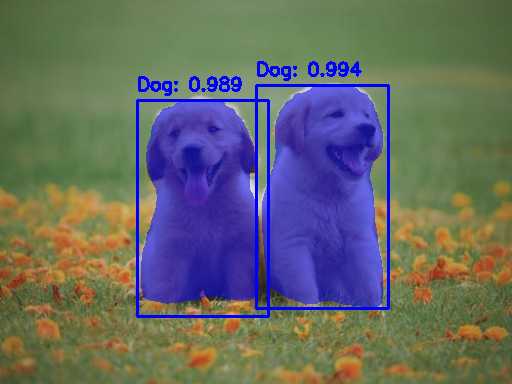

In [63]:
# convert the image back to BGR so we can use OpenCV's drawing
# functions
image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
# loop over the predicted scores and class labels
for i in range(0, len(r["scores"])):
	# extract the bounding box information, class ID, label, predicted
	# probability, and visualization color
	(startY, startX, endY, endX) = r["rois"][i]
	classID = r["class_ids"][i]
	label = CLASS_NAMES[classID]
	score = r["scores"][i]
	color = [int(c) for c in np.array(COLORS[classID]) * 255]
	# draw the bounding box, class label, and score of the object
	cv2.rectangle(image, (startX, startY), (endX, endY), color, 2)
	text = "{}: {:.3f}".format(label, score)
	y = startY - 10 if startY - 10 > 10 else startY + 10
	cv2.putText(image, text, (startX, y), cv2.FONT_HERSHEY_SIMPLEX,
		0.6, color, 2)
# show the output image
# cv2_imshow("Output", image)
# cv2.waitKey()
cv2_imshow(image)